# 利用随机森林分析波士顿房价

# 1.导入相应包

In [20]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.datasets import load_boston # 数据集
from sklearn.impute import SimpleImputer  #数据缺失值补全方法
from sklearn.ensemble import RandomForestRegressor # 随机森林回归算法
from sklearn.model_selection import cross_val_score # 交叉验证方法
from sklearn.model_selection import train_test_split # 划分数据集

from sklearn.feature_extraction import DictVectorizer           
from sklearn.tree import DecisionTreeClassifier, export_graphviz           
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# 2.准备数据集
使用sklearn自带的波士顿房价数据集

In [2]:
dataset = load_boston()
X_full, y_full = dataset.data, dataset.target
dataset.data.shape
# dataset

(506, 13)

In [3]:
X = pd.DataFrame(data=dataset['data'])
X.columns = dataset['feature_names']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


共有506条数据，13个输入变量和一个输出变量。
- CRIM：城镇人均犯罪率
- ZN：住宅用地超过25000 sq.ft. 的比例
- INDUS：城镇非零售商用土地的比例
- CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）
- NOX：一氧化氮浓度
- RM：住宅平均房间数
- AGE：1940年之前建成的自用房屋的比例
- DIS：到波士顿五个中心区域的加权距离
- RAD：辐射性公路的接近指数
- TAX：每10000美元的全职财产税率
- PTRATIO：城镇师生比例
- B：1000(BK-0.63)^2，其中BK代表城镇中黑人的比例
- LSTAT：人口中地位低下者的比例

In [4]:
Y = dataset['target']
print(len(Y))

506


In [5]:
plt.figure(figsize=(10,10))
# sns.heatmap(dataset)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

将原始数据集划分为训练集和预测集

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

引入随机森林回归模型

In [7]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [8]:
preds = model.predict(X_test)
preds

array([14.02976449, 48.915     , 40.07      , 28.69069675, 20.73637434,
       19.43115693, 33.86139312, 15.02172123,  9.28956384, 14.260605  ,
       28.18711335, 21.31143978, 26.07805509, 21.0636485 , 32.83745423,
       28.11310867, 16.65457658, 24.39360384, 10.52158083, 19.09418868,
       23.89053463, 35.69086396,  8.27526226, 21.88839995,  8.63204869,
       15.9337247 , 16.80403974, 19.7255507 , 41.515     , 20.73637434,
       37.2727322 , 23.39459196, 19.95490802, 21.74453767, 15.05507962,
       24.23436275, 12.60121077, 20.41008336, 16.55347856, 14.56629419,
       20.96105201, 25.41183938, 33.09800648, 15.46534035, 21.66388143,
       21.75516578, 35.38110206, 16.61343949, 20.73637434, 21.02337157,
       18.28806518, 35.366099  , 26.27030166, 26.07      , 31.35327132,
       16.25545963, 15.25577831, 19.99257499, 23.5771655 , 21.75516578,
        8.25649314, 30.0712555 , 17.93384857, 18.97274027, 20.32948666,
       20.78609838, 45.64833333, 32.3011184 , 17.45874121, 21.02

通过均方根误差评估预测效果
####  这里，由于样本较少，训练集和测试集划分随机性大，mse值可能会有较大变化，会影响最终图像
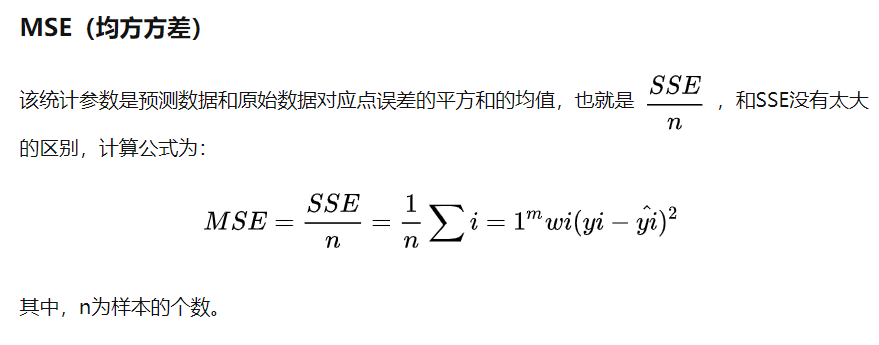

In [9]:
rmse = np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(preds)),2)))
rmse

3.4004873493312964

通过绘图直观地观察预测情况

<IPython.core.display.Javascript object>


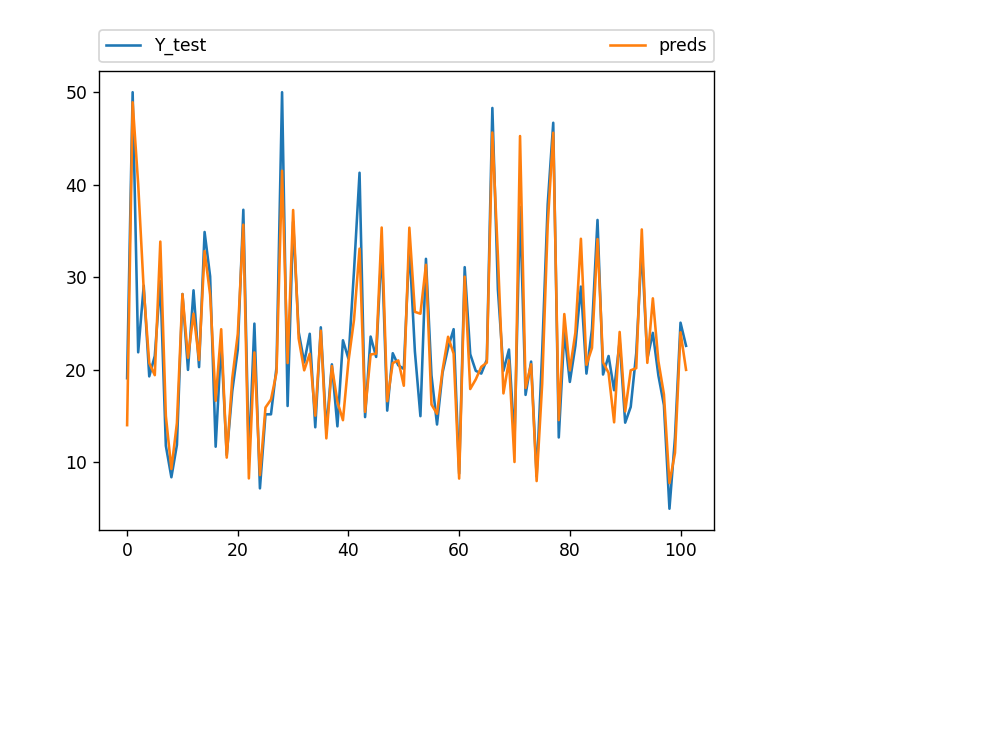

In [21]:
plt.plot(Y_test,label="Y_test")
plt.plot(preds,label="preds")
# 设置loc参数确定图例框的位置
# 设置列数为nloc=3，指定边框的（bbox_to_anchor）的起始位置为（0.0,1.02），
# 设置宽度为1，高度为0.102，注意这些值都是基于归一化坐标系。参数mode可以设置为None或者expand，
# 当为expand时，图例框会水平的扩展至整个坐标轴区域。参数borderaxespad指定了坐标轴和图例边界之间的间距。

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)
plt.show()

## 计算基尼系数

In [12]:
dtf = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=3, min_samples_leaf=1)
dtf.fit(X_train,  Y_train.astype('int'))


DecisionTreeClassifier(max_depth=4, min_samples_split=3)

## 绘制随机森林

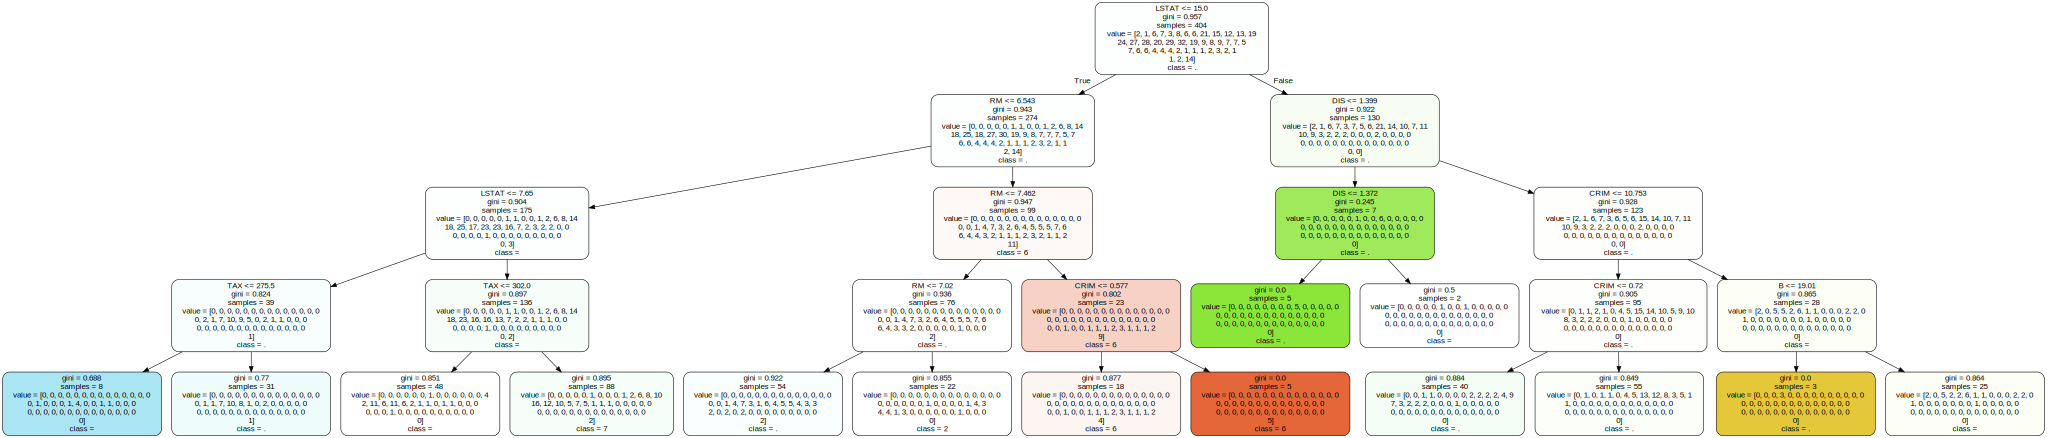

In [13]:
dot_data = export_graphviz(
    dtf, 
    feature_names=dataset.feature_names,
    class_names=str(dataset.target),
    filled=True,
    rounded=True
)
# graph [size =“7.75,10.25”]
graph = graphviz.Source(dot_data)
# graph [autosize=false,size="5.0,8.3"]

graph

## 这里我们将对波士顿房价的原始数据进行处理，在数据中人为添加一些缺失值，然后根据分三种情况：①用0填补缺失值，②均值填补，③用随机森林填补，之后分别构建随机森林回归，计算MSE，并做可视化。

# 3.对数据集设置50%缺失值

In [14]:
#样本数和特征数
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%
rng = np.random.RandomState(0)
#缺失率
missing_rate = 0.5
#应确实总数
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
#通过随机数设置这n_missing_samples个缺失值的横纵索引
missing_features = rng.randint(0, n_features, n_missing_samples)
missing_samples = rng.randint(0, n_samples, n_missing_samples)
#保留原数据
X_missing = X_full.copy()
y_missing = y_full.copy()
#设置缺失值np.nan并转换为DataFrame格式
X_missing[missing_samples, missing_features] = np.nan
X_missing = pd.DataFrame(X_missing)


# 4.均值代替缺失值

In [15]:
#设置SimpleImputer利用均值填充
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)

# 5.零代替缺失值

In [16]:
#设置SimpleImputer利用0填充
imp_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)


# 6.随机森林回归计算缺失值  
   这里简要讲述一下我们思路，任何回归都是从特征矩阵中学习，然后求解连续型标签y的过程，之所以能够实现这个过程，是因为回归算法认为，特征矩阵和标签之前存在着某种联系。实际上，标签和特征是可以相互转换的，比如说，在一个“用地区，环境，附近学校数量”预测“房价”的问题中，我们既可以用“地区”，“环境”，“附近学校数量”的数据来预测“房价”，也可以反过来，用“环境”，“附近学校数量”和“房价”来预测“地区”。而回归填补缺失值，正是利用了这种思想。

对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签组成新的特征矩阵。那对于T来说，它没有缺失的部分，就是我们的Y_test，这部分数据既有标签也有特征，而它缺失的部分，只有特征没有标签，就是我们需要预测的部分。  
   这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。   
  那如果数据中除了特征T之外，其他特征也有缺失值怎么办？  
  答案：是遍历所有的特征，从缺失最少的开始进行填补（因为填补缺失最少的特征所需要的准确信息最少）。填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填补下一个特征。每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。当进行到最后一个特征时（这个特征应该是所有特征中缺失值最多的），已经没有任何的其他特征需要用0来进行填补了，而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。  
  遍历所有的特征后，数据就完整，不再有缺失值了。  

In [17]:
X_missing_reg = X_missing.copy()
#利用np.argsort将数据按每列的缺失值进行排序并获取排序索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
#依次遍历每个索引
for i in sortindex:
    #构建我们的新特征矩阵和新标签
    df = X_missing_reg
    #需要填补的列
    fillc = df.iloc[:,i]
    #将除i以外的列以及房价y列合并作为训练集
    df = pd.concat([df.iloc[:, df.columns != i], pd.DataFrame(y_full)], axis=1)
    #将训练集缺失值部分取0
    df_0 = imp_0.fit_transform(df)

    #划分训练测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index, :]
    Xtest = df_0[Ytest.index, :]
    #构造随机森林
    rfc = RandomForestRegressor(n_estimators=25)
    rfc.fit(Xtrain, Ytrain)
    #预测并将值保存到原始矩阵中
    Ypredict = rfc.predict(Xtest)
    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), i] = Ypredict


# 7.统计建模分析  
这里我们采用MSE作为评价指标。

In [24]:
#进行建模分析
X = [X_full, X_missing_mean, X_missing_0, X_missing_reg]
mse = []
std = []
#一次对三种情况与原始数据进行预测评估
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=50)
    score = cross_val_score(estimator, x, y_full, scoring='neg_mean_squared_error', cv=5).mean()
    #注意上述score为负MSE，需要×-1
    mse.append(score * -1)
mse

[22.175249683401272, 40.723726186293916, 48.24977306534653, 19.90898248751698]

# 8.数据可视化  

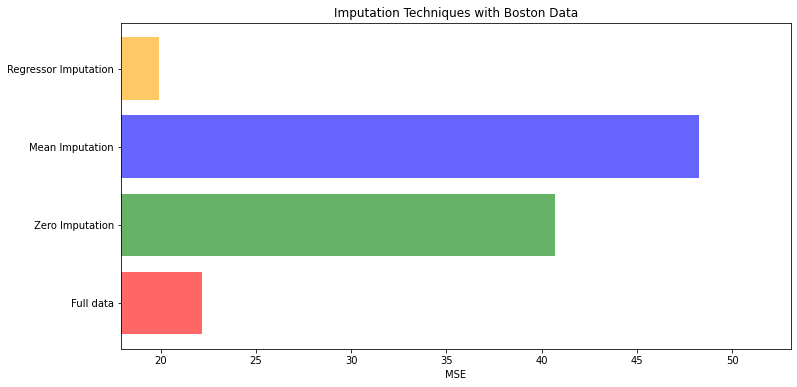

In [19]:
#可视化
x_labels = ['Full data', 'Zero Imputation', 'Mean Imputation', 'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
	#水平条形图将数据依次遍历画出
    ax.barh(i, mse[i], color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
#设置x轴坐标上下限
ax.set_xlim(left=np.min(mse) * 0.9, right=np.max(mse) * 1.1)
#y轴刻度
ax.set_yticks(np.arange(len(mse)))
#x轴标签
ax.set_xlabel('MSE')
#y轴每个刻度的标签
ax.set_yticklabels(x_labels)
plt.show()
